Установить:
    1. Scipy
    2. Matplotlib
    3. Numpy
    4. cosmolopy
    5. astLib

In [1]:
!ls .

astStats.py	    dist		       setup.py
build		    __pycache__		       Tutorial (caustics).ipynb
causticpy	    README.md
causticpy.egg-info  RunningtheCausticCode.pdf


In [2]:
#!pip install cosmolopy
#!pip install astLib
#!python --version

In [3]:
import numpy as np
import scipy

import cosmolopy
import astLib

Посавить скобки у print в файлах \__init__\.py, setup.py

In [4]:
!python 'setup.py' install

running install
running bdist_egg
running egg_info
writing causticpy.egg-info/PKG-INFO
writing dependency_links to causticpy.egg-info/dependency_links.txt
writing top-level names to causticpy.egg-info/top_level.txt
reading manifest file 'causticpy.egg-info/SOURCES.txt'
writing manifest file 'causticpy.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/causticpy
copying build/lib/causticpy/__init__.py -> build/bdist.linux-x86_64/egg/causticpy
byte-compiling build/bdist.linux-x86_64/egg/causticpy/__init__.py to __init__.cpython-37.pyc
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying causticpy.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying causticpy.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying causticpy.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying causticpy.egg-info/n

In [5]:
import pandas as pd
from causticpy import *

ga_2, gr_2 = pd.read_csv('../Data/galist_2.csv'), pd.read_csv('../Data/grlist_2.csv')
ga_s, gr_s = pd.read_csv('../Data/galist_s.csv'), pd.read_csv('../Data/grlist_s.csv')
display(ga_2.shape, gr_2.shape, ga_s.shape, gr_s.shape)


a_cols = ga_s.columns.tolist()
r_cols = gr_s.columns.tolist()

display(ga_s.head(3))
display(gr_s.head(3))

# объединение по iGrID
g_2, g_s = pd.merge(ga_2, gr_2, on='iGrID'), pd.merge(ga_s, gr_s, on='iGrID')

# фильтрация по Ntot
g_2, g_s = g_2[g_2.Ntot > 30], g_s[g_s.Ntot > 30]

ac = Caustic()
rc = Caustic()

# первые три признака : ra, dec, z
as_good_flag = ac.run_caustic(np.array(ga_s[a_cols[3:6]]))
rs_good_flag = rc.run_caustic(np.array(gr_s[r_cols[1:4]]))

(43425, 7)

(31506, 15)

(402439, 8)

(229893, 16)

,iGalID,iGrID,Name,RAJ2000,DEJ2000,z,logMstar,Dist
0,242970,138964,1237663784217149584,45.074932,0.110856,0.061557,9.54906,
1,240914,137871,1237663784217149588,45.090614,0.136589,0.102016,10.28103,
2,293694,167171,1237666301090202000,45.188526,0.274797,0.101959,NaN,


,iGrID,RAJ2000,DEJ2000,z,logLtot,logLobs,logMtot,logMstar,NMstar,logMdyn,sigma,Rad,angRad,DL,Ntot,Dist
0,138964,45.074932,0.110856,0.061557,9.89662,9.80936,11.65186,9.54906,1,NaN,NaN,NaN,NaN,266.1356,1,
1,137871,45.090614,0.136589,0.102016,10.48778,10.26958,12.09710,10.28104,1,NaN,NaN,NaN,NaN,456.4026,1,
2,167171,45.188526,0.274797,0.101959,10.23475,10.01679,11.84485,NaN,0,NaN,NaN,NaN,NaN,456.1262,1,


DATA SET SIZE 59
Pre_r200= 2.9781259001541316
Calculating Density w/Mirrored Data
Vdisp from galaxies= 2390.0504760712256
Combined Vdisp= 2390.0504760712256
Calculating initial surface
complete
DATA SET SIZE 44
Pre_r200= 2.945343281795476
Calculating Density w/Mirrored Data
Vdisp from galaxies= 2303.5417895261544
Combined Vdisp= 2303.5417895261544
Calculating initial surface
complete


In [6]:
as_good_flag, rs_good_flag

(1, 1)

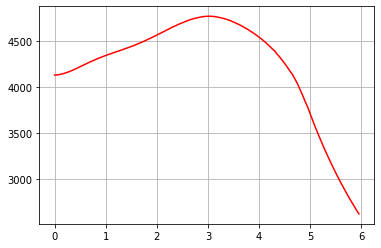

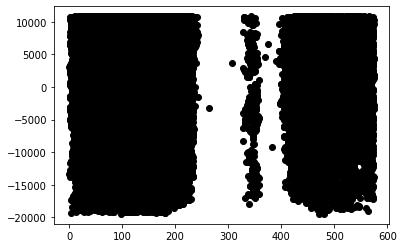

In [7]:
#from pylab import *
import  matplotlib.pyplot as plt
%matplotlib inline

r, v = rc.r, rc.v
x_range, caustic_profile = rc.x_range, rc.caustic_profile

plt.figure()
plt.grid()
plt.plot(x_range, caustic_profile, c='r')

plt.show();
plt.figure()
plt.scatter(r, v, c='black')
#plt.xlim(0, 2)
#plt.ylim(-1500, 1500)
plt.show();

здесь подсчет для всех данных (нужно сделать для каждой группы отдельно)